# Neural Network

## 0. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Read data

In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)

In [3]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
df.shape

(284807, 31)

## 2. Data Prep

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

### Feature Selection

In [9]:
X = df.drop('Class', axis =1)
y = df['Class']

### Balanced dataset

In [11]:
rus = RandomUnderSampler(random_state=123)
X, y = rus.fit_resample(X,y)

In [13]:
y.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0, stratify=y)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train = X_train.to_numpy()
X_test= X_test.to_numpy()

In [19]:
X_train.shape, y_test.shape

((787, 30), (197,))

In [20]:
X_test.shape,y_test.shape

((197, 30), (197,))

### Reshape data

In [22]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

## 3. Build a Neural Net

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Convolution1D, Flatten, Dropout, MaxPooling1D, BatchNormalization, Conv1D, MaxPool1D
from keras.optimizers import Adam
import tensorflow as tf

In [27]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,  activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [29]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy',  metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
25/25 [==============================] - 1s 38ms/step - loss: 0.1913 - accuracy: 0.9301 - val_loss: 0.2296 - val_accuracy: 0.9086
Epoch 2/20
25/25 [==============================] - 0s 16ms/step - loss: 0.2146 - accuracy: 0.9314 - val_loss: 0.2221 - val_accuracy: 0.9086
Epoch 3/20
25/25 [==============================] - 0s 15ms/step - loss: 0.1991 - accuracy: 0.9288 - val_loss: 0.2207 - val_accuracy: 0.9086
Epoch 4/20
25/25 [==============================] - 0s 17ms/step - loss: 0.1790 - accuracy: 0.9327 - val_loss: 0.2210 - val_accuracy: 0.9086
Epoch 5/20
25/25 [==============================] - 0s 16ms/step - loss: 0.2068 - accuracy: 0.9352 - val_loss: 0.2129 - val_accuracy: 0.9086
Epoch 6/20
25/25 [==============================] - 0s 17ms/step - loss: 0.1899 - accuracy: 0.9327 - val_loss: 0.2131 - val_accuracy: 0.9086
Epoch 7/20
25/25 [==============================] - 0s 16ms/step - loss: 0.2001 - accuracy: 0.9276 - val_loss: 0.2093 - val_accuracy: 0.9086
Epoch 8/20
25

### Visualize results

In [35]:
epoch = 20

In [37]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

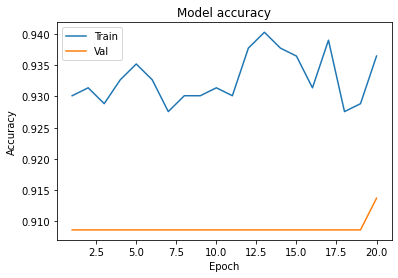

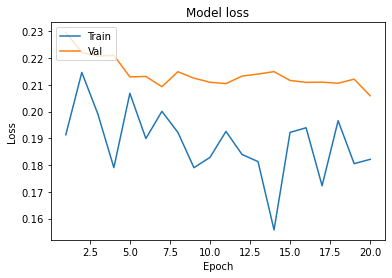

In [38]:
plot_learningCurve(history, epoch)

### Adding MaxPoling

In [40]:
epoch = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2,  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 32)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 64)            

In [42]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy',  metrics=['accuracy'])

In [43]:
history = model.fit(X_train, y_train, epochs=epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
25/25 [==============================] - 3s 30ms/step - loss: 1.0997 - accuracy: 0.5423 - val_loss: 0.6112 - val_accuracy: 0.4975
Epoch 2/50
25/25 [==============================] - 0s 13ms/step - loss: 0.6580 - accuracy: 0.7156 - val_loss: 0.4582 - val_accuracy: 0.8629
Epoch 3/50
25/25 [==============================] - 0s 13ms/step - loss: 0.6063 - accuracy: 0.7706 - val_loss: 0.3882 - val_accuracy: 0.8934
Epoch 4/50
25/25 [==============================] - 0s 14ms/step - loss: 0.5217 - accuracy: 0.7976 - val_loss: 0.3545 - val_accuracy: 0.8731
Epoch 5/50
25/25 [==============================] - 0s 13ms/step - loss: 0.4577 - accuracy: 0.8286 - val_loss: 0.3253 - val_accuracy: 0.8883
Epoch 6/50
25/25 [==============================] - 0s 13ms/step - loss: 0.4113 - accuracy: 0.8485 - val_loss: 0.3074 - val_accuracy: 0.8985
Epoch 7/50
25/25 [==============================] - 0s 13ms/step - loss: 0.4672 - accuracy: 0.8063 - val_loss: 0.2956 - val_accuracy: 0.8985
Epoch 8/50
25

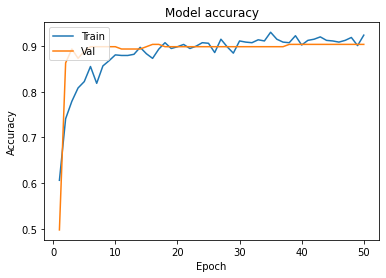

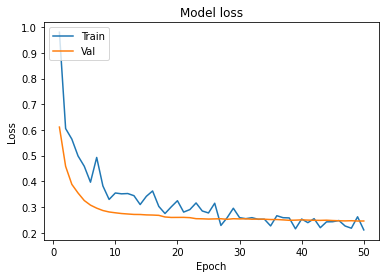

In [44]:
plot_learningCurve(history, epoch)